  ## NIGERIA COVID'19 REAL TIME DATA ANALYSIS USING PYTHON

                          (JANUARY, 2020 - MAY 4TH, 2021)    
                                     BY 
                              EMMANUEL EBIENDELE

### Overview

Coronavirus(Covid'19) are known as respiratory viruses that can cause illness in people and animals. In rear cases, these virus circulate among animals which can evolve and infect humans.
  
Due to this spread of coronavirus(Covid'19) most countries in the world like Nigeria were forced to shut down all activities such as workplaces, Airport etc. which affected the growth of Nigeria Economy             
The goal of this project is to answer real-world questions by considering an in-depth analytical approach.

### Task 1 - Data Collection

In these process we'll obtain the required data for the analysis,performing  web scrapping to obtain data from the NCDC website

importing data from the JoHn Hopkins repository and lastly 

importing the provided external data.

### A - NCDC Website scrap

In these process we'll import the neccessary libary needed

Assigning the url of the webpage to a variable  https://covid19.ncdc.gov.ng/

Assigning the result of a request of the webpage to a variable using requests.get() method

Making use of the status_code of the feedback. status_code that begins with 2 generally indicate success.

Reading the text-based contents of the web files.

Making the text more readable than the way it comes from the request modules, BeautifulSoup module will be used to parse data from the html files

Extract from the web file, table with id:custom1 using BeautifulSoup's findAll() method

Extracting the table rows from the table with list 'tr' argument in table.findAll() method

Creating a csv files and finally saving the data to a dataframe object

In [39]:
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [40]:
url = 'https://covid19.ncdc.gov.ng/'
response = requests.get(url)
print(response.status_code)

200


In [41]:
soup = BeautifulSoup(response.text,"html.parser")

In [42]:
table = soup.findAll('table',{"id":"custom1"})[0]
values =[]

In [43]:
tr = table.findAll(['tr'])

In [44]:
csvFile = open("nigERIa_covid.csv",'wt',newline='',encoding='utf-8')
writer = csv.writer(csvFile)  
try:
    for cell in tr:
        th = cell.find_all('th')
        th_data = [col.text.strip('\n') for col in th]
        td = cell.find_all('td')
        row = [i.text.replace('\n','') for i in td]
        writer.writerow(th_data+row) 
        
finally:
    csvFile.close()

In [47]:
dfNIgeria = pd.read_csv('nigERIa_covid.csv')

### B - John Hopkins Data Repository

Here we'll obtain data from the John Hopkins repository, saving the data from the GitHub repo link to DataFrame for further analysis. 

In [48]:
#df1
confirmed_global = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df_confirmed_global = pd.read_csv(confirmed_global)

#df2
recovered_global = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
df_recovered_global = pd.read_csv(recovered_global)

#df3
deaths_global = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df_deaths_global = pd.read_csv(deaths_global)

### C - External Data
Saving the external data to a DataFrame

In [49]:
df_external = pd.read_csv('covid_external.csv')

In [50]:
df_budget = pd.read_csv('Budget data.csv')

In [51]:
df_readgdp = pd.read_csv('RealGDP.csv')

### Task 2 - View the data
We'll obtain basic information about the data using the head() and info() method then tail() method which is optional.

In [52]:
dfNIgeria.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,...,"58,515 ...","1,086","56,990 ...",439
1,...,"19,791 ...",528,"19,097 ...",166
2,...,"9,062",14,"8,983",65
3,...,"9,059",15,"8,987",57
4,...,"7,115",1,"7,013",101


In [53]:
dfNIgeria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 952.0+ bytes


In [54]:
df_confirmed_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,58843,59015,59225,59370,59576,59745,59939,60122,60300,60563
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,130537,130606,130736,130859,130977,131085,131185,131238,131276,131327
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,120922,121112,121344,121580,121866,122108,122311,122522,122717,122999
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13060,13083,13121,13148,13198,13232,13232,13282,13295,13316
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,25609,25710,25942,26168,26431,26652,26815,26993,27133,27284


In [55]:
df_confirmed_global.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21
270,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,2843,2852,2857,2865,2910,2928,2942,2962,2985,2995
271,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,290972,292052,293466,294550,295601,296462,296462,297638,298203,298921
272,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,6137,6183,6220,6263,6294,6317,6325,6341,6363,6390
273,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,91358,91378,91418,91484,91533,91586,91670,91693,91722,91804
274,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,38086,38102,38164,38191,38235,38257,38260,38281,38293,38327


In [56]:
df_recovered_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,52489,52520,52794,52974,53103,53206,53272,53391,53391,53694
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,105728,106465,107163,107887,108606,109338,110172,110920,111792,112626
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,84299,84440,84598,84745,84940,85108,85249,85398,85534,85693
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,12491,12519,12561,12590,12650,12684,12684,12753,12793,12818
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,23092,23288,23341,23584,23606,23876,23913,23913,24190,24190


In [57]:
df_recovered_global.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21
255,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,2516,2516,2516,2516,2516,2516,2548,2549,2560,2560
256,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,262602,264660,267346,268054,271233,272333,272333,275392,276171,277673
257,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2546,2630,2674,2700,2731,2751,2794,2875,2910,2948
258,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,89574,89678,89717,89743,89852,89933,90012,90082,90130,90166
259,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,35123,35149,35480,35517,35594,35612,35620,35634,35647,35775


In [58]:
df_deaths_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2582,2592,2598,2611,2618,2625,2631,2637,2642,2648
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2378,2379,2383,2386,2389,2394,2396,2397,2399,2402
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3207,3217,3225,3234,3244,3253,3261,3270,3280,3289
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,124,124,124,125,125,125,125,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,579,583,587,591,594,596,600,602,603,609


In [59]:
df_deaths_global.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21
270,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,35,35,35,35,35,35,35,35,35,35
271,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,3167,3184,3201,3206,3231,3249,3249,3272,3283,3296
272,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1187,1205,1207,1216,1222,1226,1229,1233,1239,1240
273,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,1246,1248,1249,1249,1250,1251,1251,1253,1253,1254
274,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,1557,1560,1565,1565,1567,1567,1568,1570,1573,1574


In [60]:
df_external.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [61]:
df_external.tail()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
32,Oyo,South West,8737000,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06
33,Ogun,South West,5878000,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07
34,Ondo,South West,5185000,0.1,0.8,0.5,0.1,0.3,0.6,0.3,0.3,1.04
35,Osun,South West,5252000,0.0,0.7,0.4,0.4,0.0,0.8,0.1,0.2,1.06
36,Ekiti,South West,3593000,0.3,0.8,0.3,0.5,0.2,0.8,0.1,0.4,1.03


In [62]:
df_external.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.2+ KB


### Task 3 - Data Cleaning and Preparation
From the information obtained above, we'll need to fix the data format.

Examples:

Convert to appropriate data type.

Rename the columns of the scraped data.

Remove comma(,) in numerical data

Extract daily data for Nigeria from the Global daily cases data

TODO A - Clean the scraped data

In [63]:
dfNIgeria.columns = ['states', 'cases_lab_confirmed', 'cases_on_admission', 'discharged', 'deaths']

In [64]:
dfNIgeria.head()

,states,cases_lab_confirmed,cases_on_admission,discharged,deaths
0,...,"58,515 ...","1,086","56,990 ...",439
1,...,"19,791 ...",528,"19,097 ...",166
2,...,"9,062",14,"8,983",65
3,...,"9,059",15,"8,987",57
4,...,"7,115",1,"7,013",101


In [65]:
# Remove the extra white spaces and comma then convert 'cases_lab_confirmed', 'cases_on_admission', 'discharged' to numeric
dfNIgeria = dfNIgeria.replace({',':'', ' ':''}, regex=True)
a = dfNIgeria[['cases_lab_confirmed', 'cases_on_admission', 'discharged']].columns
dfNIgeria[a] = dfNIgeria[a].apply(pd.to_numeric,errors='coerce')

In [66]:
dfNIgeria.head()

,states,cases_lab_confirmed,cases_on_admission,discharged,deaths
0,Lagos,58515,1086,56990,439
1,FCT,19791,528,19097,166
2,Kaduna,9062,14,8983,65
3,Plateau,9059,15,8987,57
4,Rivers,7115,1,7013,101


In [67]:
dfNIgeria.tail()

,states,cases_lab_confirmed,cases_on_admission,discharged,deaths
32,Kebbi,450,42,392,16
33,Yobe,409,25,375,9
34,CrossRiver,394,0,376,18
35,Zamfara,240,11,221,8
36,Kogi,5,0,3,2


In [68]:
dfNIgeria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   states               37 non-null     object
 1   cases_lab_confirmed  37 non-null     int64 
 2   cases_on_admission   37 non-null     int64 
 3   discharged           37 non-null     int64 
 4   deaths               37 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.4+ KB


TODO B - Get a Pandas DataFrame for Daily Confirmed Cases in Nigeria. Columns are Date and Cases

In [69]:
df_confirmed_global = df_confirmed_global.drop(['Province/State', 'Lat', 'Long'], axis=1)

In [70]:
confirmed_nig = df_confirmed_global.groupby('Country/Region').sum().loc['Nigeria']

In [71]:
confirmed_nig = confirmed_nig.to_frame().reset_index()

In [72]:
confirmed_nig.columns = ['Date', 'Cases']
confirmed_nig['Date'] = pd.to_datetime(confirmed_nig['Date'])
confirmed_nig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    469 non-null    datetime64[ns]
 1   Cases   469 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 7.4 KB


In [73]:
confirmed_nig.head()

,Date,Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [74]:
confirmed_nig.tail()

,Date,Cases
464,2021-04-30,165110
465,2021-05-01,165110
466,2021-05-02,165153
467,2021-05-03,165199
468,2021-05-04,165215


TODO C - Get a Pandas DataFrame for Daily Recovered Cases in Nigeria. Columns are Date and Cases

In [75]:
df_recovered_global = df_recovered_global.drop(['Province/State', 'Lat', 'Long'], axis=1)

In [76]:
recovered_nig = df_recovered_global.groupby('Country/Region').sum().loc['Nigeria']

In [77]:
recovered_nig = recovered_nig.to_frame().reset_index()

In [78]:
recovered_nig

,index,Nigeria
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0
...,...,...
464,4/30/21,155101
465,5/1/21,155101
466,5/2/21,155109
467,5/3/21,155371


In [79]:
recovered_nig.columns = ['Date', 'Cases']
recovered_nig['Date'] = pd.to_datetime(recovered_nig['Date'])
recovered_nig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    469 non-null    datetime64[ns]
 1   Cases   469 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 7.4 KB


In [80]:
recovered_nig.tail()

,Date,Cases
464,2021-04-30,155101
465,2021-05-01,155101
466,2021-05-02,155109
467,2021-05-03,155371
468,2021-05-04,155371


TODO D - Geting a Pandas DataFrame for Daily Death Cases in Nigeria. Columns are Date and Cases

In [81]:
df_deaths_global = df_deaths_global.drop(['Province/State', 'Lat', 'Long'], axis=1)
deaths_nig = df_deaths_global.groupby('Country/Region').sum().loc['Nigeria']
deaths_nig = deaths_nig.to_frame().reset_index()
deaths_nig.columns = ['Date', 'Cases']
deaths_nig['Date'] = pd.to_datetime(deaths_nig['Date'])
deaths_nig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    469 non-null    datetime64[ns]
 1   Cases   469 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 7.4 KB


In [82]:
deaths_nig.head()

,Date,Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [83]:
deaths_nig.tail()

,Date,Cases
464,2021-04-30,2063
465,2021-05-01,2063
466,2021-05-02,2063
467,2021-05-03,2063
468,2021-05-04,2063


### Task 4 - Analysis

Here we'll perform some analyses on the dataset which includes:

Generating a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

Generating a plot that shows the Top 10 states in terms of Discharged Covid cases

Generating a plot that shows the Top active cases

Generating a line plot for the total daily confirmed, recovered and death cases in Nigeria

Determine the daily infection rate, using the Pandas diff method to find the derivate of the total cases and generating a line plot for the daily infection rate

Calculate maximum infection rate for a day (Number of new cases) and find the date

Determine the relationship between the external dataset and the NCDC COVID-19 dataset. Here we'll generate a line plot of top 10 confirmed cases and the overall community vulnerability index on the same axis.

Determine the relationship between the external dataset and the NCDC COVID-19 dataset. Here we will generate a regression plot between two variables to visualize the linear relationships - Confirmed Cases and Population Density using seaborn regression plot....etc

### TODO A 

Generating a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

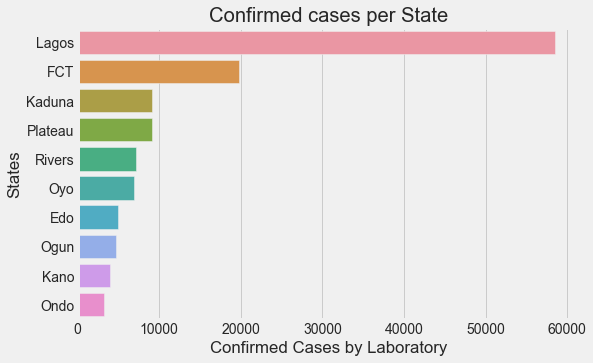

In [118]:
data = dfNIgeria.nlargest(10, 'cases_lab_confirmed')
fig = plt.figure(figsize=(8, 5))
ax = sns.barplot(x='cases_lab_confirmed', y='states', data=data[['states', 'cases_lab_confirmed']])
ax.set_title('Confirmed cases per State')
ax.set_xlabel('Confirmed Cases by Laboratory')
ax.set_ylabel('States');

Lagos State has the highest number of confirmed Covid'19 Cases followed by FCT and Kaduna state

### TODO B 

Generate a plot that shows the Top 10 states in terms of Discharged Covid cases.

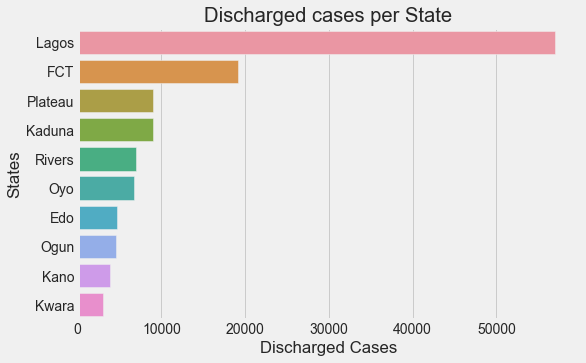

In [93]:
fig = plt.figure(figsize=(8, 5))
ax = sns.barplot(x='discharged', y='states', data=dfNIgeria[['states', 'discharged']].sort_values(by=['discharged'],ascending=False).loc[:10])
ax.set_xlabel('Discharged Cases')
ax.set_title('Discharged cases per State')
ax.set_ylabel('States');

Lagos state has the highest number of discharged cases followed by FCT and Plateau

### TODO-C

Generating a plot that shows the Top active cases

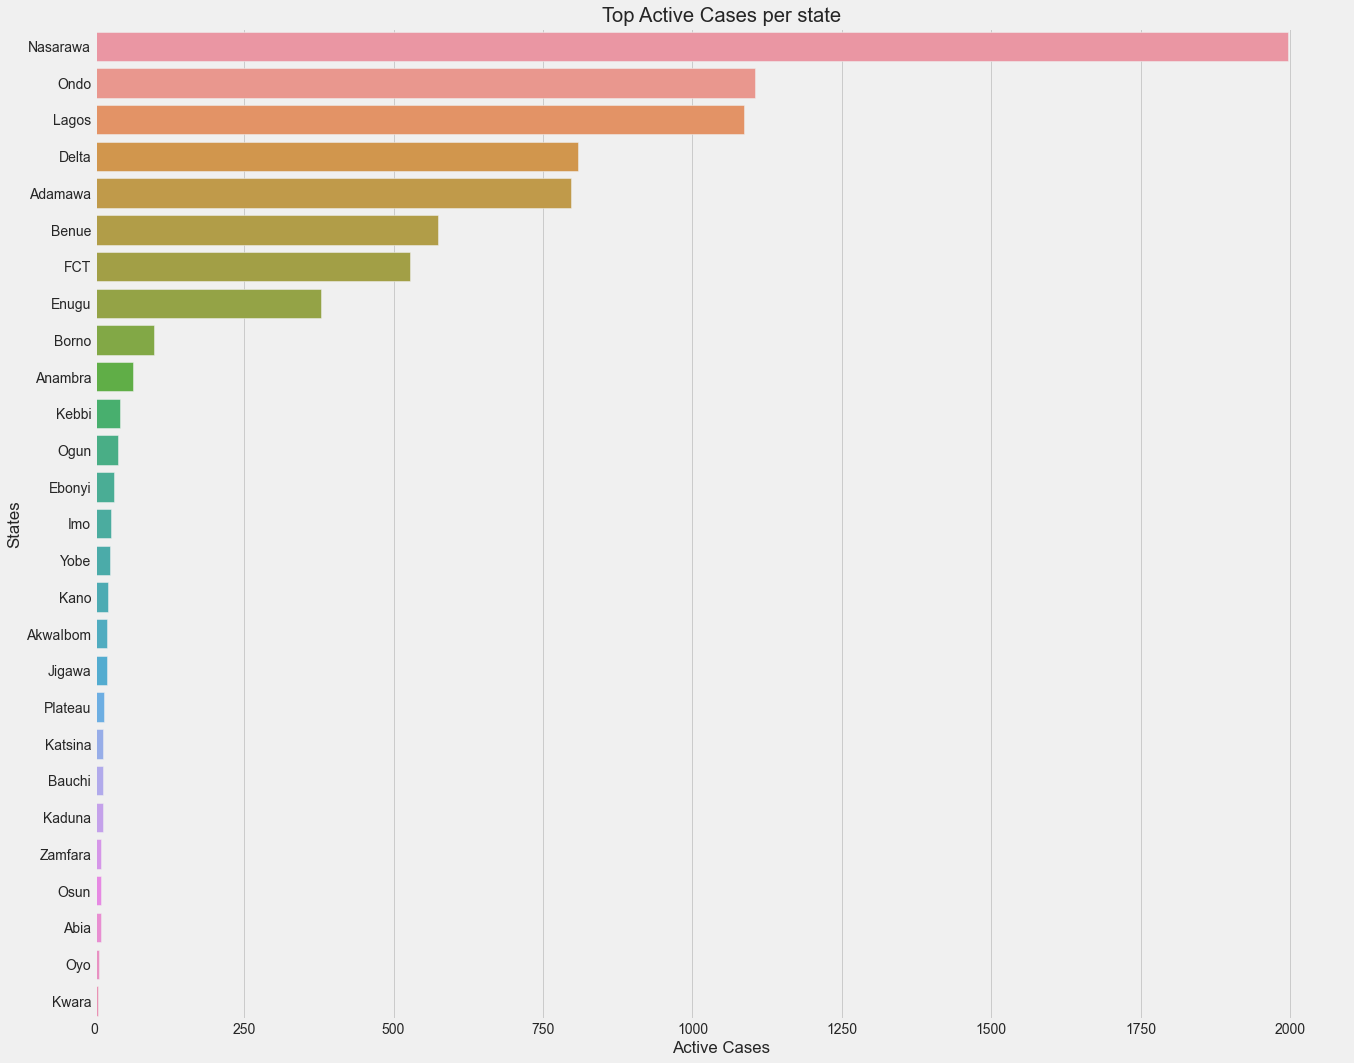

In [142]:
fig = plt.figure(figsize=(20, 17))
ax = sns.barplot(x='cases_on_admission', y='states', data=dfNIgeria[['states', 'cases_on_admission']].sort_values(by=['cases_on_admission'],ascending=False).loc[:10])
ax.set_xlabel('Active Cases')
ax.set_title('Top Active Cases per state')
ax.set_ylabel('States');

In summary Nasarawa has the highest number of active cases in Nigeria followed by Ondo state then Lagos state.

### TODO-D

Generating a plot that shows the Top 10 deaths cases

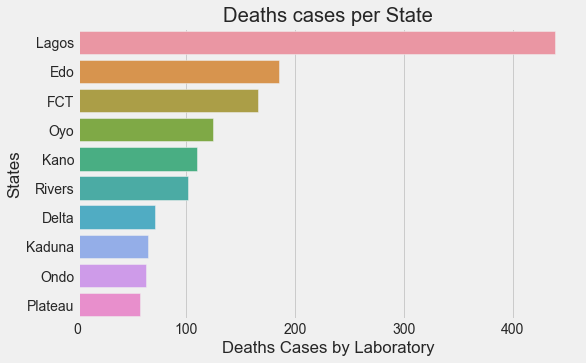

In [143]:
data = dfNIgeria.nlargest(10, 'deaths')
fig = plt.figure(figsize=(8, 5))
ax = sns.barplot(x='deaths', y='states', data=data[['states', 'deaths']])
ax.set_title('Deaths cases per State')
ax.set_xlabel('Deaths Cases by Laboratory')
ax.set_ylabel('States');

Lagos state has the highest deaths cases followed by Edo state and FCT

### TODO-E

Generating a line plot for the total daily confirmed, recovered and death cases in Nigeria

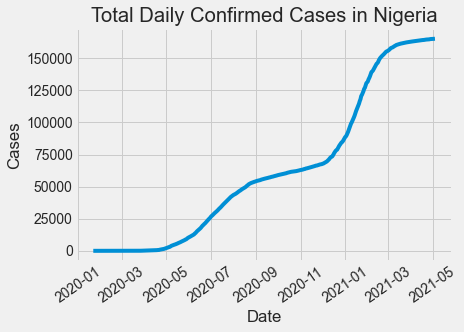

In [124]:
sns.lineplot(x="Date", y="Cases", data=confirmed_nig)
plt.xticks(rotation=35)
plt.title('Total Daily Confirmed Cases in Nigeria')
plt.show()

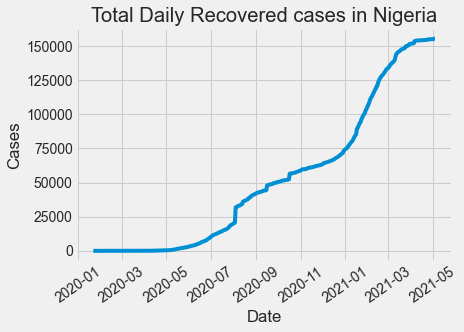

In [125]:
sns.lineplot(x="Date", y="Cases", data=recovered_nig)
plt.xticks(rotation=35)
plt.title('Total Daily Recovered cases in Nigeria')
plt.show()

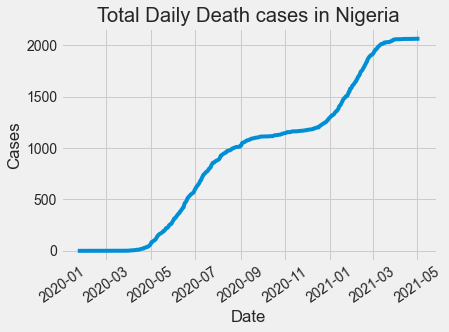

In [126]:
sns.lineplot(x="Date", y="Cases", data=deaths_nig)
plt.xticks(rotation=35)
plt.title('Total Daily Death cases in Nigeria')
plt.show()


### TODO-F
Determine the daily infection rate, using the Pandas diff method to find the derivate of the total cases and generating a line plot for the daily infection rate

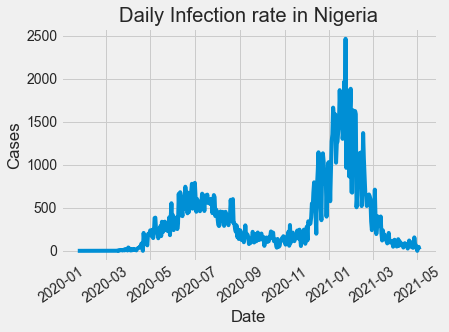

In [127]:
y = confirmed_nig['Cases'].diff()
sns.lineplot(x="Date", y=y, data=confirmed_nig)
plt.xticks(rotation=35)
plt.title('Daily Infection rate in Nigeria')
plt.show()

### TODO-G

Calculate maximum infection rate for a day (Number of new cases) and find the date

In [128]:
y.max()

2464.0

In [129]:
confirmed_nig['IFR'] = confirmed_nig['Cases'].diff()
confirmed_nig.loc[confirmed_nig['IFR'] == y.max()]

,Date,Cases,IFR
367,2021-01-23,120602,2464.0


### Observation

The maximum infection rate recorded that 2,464 new cases occured in january 23rd, 2021.

### TODO-H
Determine the relationship between the external dataset and the NCDC COVID-19 dataset. Here we'll generate a line plot of top 10 confirmed cases and the overall community vulnerability index on the same axis.

Steps

Combine the two dataset together on a common column(states)
Create a new dataframe for plotting. This DataFrame will contain top 10 states in terms of confirmed cases i.e sort by confirmed cases.

In [130]:
df_join = pd.merge(dfNIgeria, df_external, how='outer', on=['states'])

In [131]:
df_join.head()

,states,cases_lab_confirmed,cases_on_admission,discharged,deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,58515.0,1086.0,56990.0,439.0,South West,13992000.0,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,19791.0,528.0,19097.0,166.0,North Central,4865000.0,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Kaduna,9062.0,14.0,8983.0,65.0,North West,9227000.0,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
3,Plateau,9059.0,15.0,8987.0,57.0,North Central,4766000.0,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
4,Rivers,7115.0,1.0,7013.0,101.0,South South,7763000.0,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00


In [132]:
df_tcases = df_join.nlargest(11, 'cases_lab_confirmed')

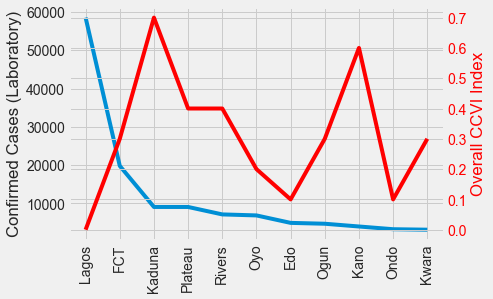

In [133]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(df_tcases['states'], df_tcases['cases_lab_confirmed'])
ax1.set_ylabel('Confirmed Cases (Laboratory)')
ax2 = ax1.twinx()
ax2.plot(df_tcases['states'], df_tcases['Overall CCVI Index'], 'r-')
ax2.set_ylabel('Overall CCVI Index', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)
plt.show()

### Observation

Northern state has the highest vulnerability index score, in relation to the confirmed cases in Nigeria, due to the weak health systems.

Lagos has a high number of confirmed cases but has a less vulnerability index score due to good health systems and performing the rule of social distancing.

### TODO-I
Determine the relationship between the external dataset and the NCDC COVID-19 dataset.

Here you will generate a regression plot between two variables to visualize the linear relationships - Confirmed Cases and Population Density. Hint: Check out Seaborn Regression Plot.

<AxesSubplot:xlabel='Population Density', ylabel='cases_lab_confirmed'>

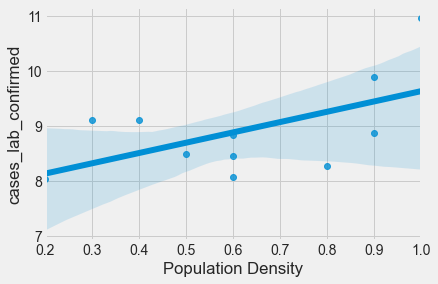

In [134]:
sns.regplot(df_tcases['Population Density'], np.log(df_tcases['cases_lab_confirmed']))

### Observation

from observation of the following plot above, Confirmed covid'19 cases and population density have positive correlation, and there are high cases, in areas that are densely populated.

TODO J -

Provide more analyses by extending TODO G & H. Meaning, determine relationships between more features.
Provide a detailed summary of your findings.
Note that you can have as many as possible.


### K- We'll determine the effect of the Pandemic on the economy. A way to do this is to explore the initial and the revised budget (from budget data).

Steps

(1).we'll combine the budget data with your data on common column(states)

(2).Create a groupby object, by grouping by region and aggregating on Initial, Revised budget and confirmed cases. Sum is the aggregating function

(3).Determine the changes in budget(Initial - Revised)

(4).Checking the groupby data or object, write down your observation. 

(5).Generate a plot for your result. e.g barplot showing total reduction for each region.

In [135]:
df_join2 = pd.merge(df_join, df_budget, how='outer', on=['states'])

In [136]:
df_join2.head()

,states,cases_lab_confirmed,cases_on_admission,discharged,deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,Initial_budget (Bn),Revised_budget (Bn)
0,Lagos,58515.0,1086.0,56990.0,439.0,South West,13992000.0,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93,1680.00,920.5
1,FCT,19791.0,528.0,19097.0,166.0,North Central,4865000.0,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79,278.78,199.0
2,Kaduna,9062.0,14.0,8983.0,65.0,North West,9227000.0,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86,259.25,223.6
3,Plateau,9059.0,15.0,8987.0,57.0,North Central,4766000.0,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93,177.30,122.0
4,Rivers,7115.0,1.0,7013.0,101.0,South South,7763000.0,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00,530.80,300.4


In [137]:
dfgroup = df_join2.groupby('region')['Initial_budget (Bn)', 'Revised_budget (Bn)', 'cases_lab_confirmed'].sum()

In [138]:
dfgroup['changes'] = abs(dfgroup['Revised_budget (Bn)'] - dfgroup['Initial_budget (Bn)'])

In [139]:
dfgroup

,Initial_budget (Bn),Revised_budget (Bn),cases_lab_confirmed,changes
region,,,,
North Central,1136.08,760.00,34096.0,376.08
North East,951.13,720.01,7406.0,231.12
North West,1385.07,1078.50,17113.0,306.57
South East,640.86,470.20,7676.0,170.66
South South,1526.08,1026.45,17558.0,499.63
South West,2774.80,1699.20,76744.0,1075.60


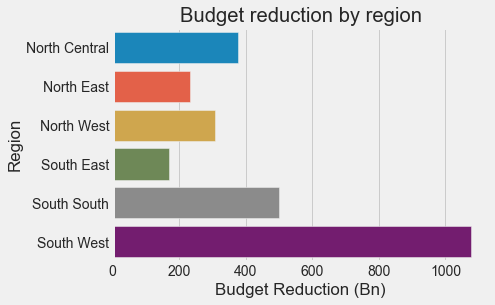

In [140]:
dfplot = dfgroup.reset_index()
y = dfplot['region']
ax = sns.barplot(x='changes', y=y, data=dfplot)
ax.set_xlabel('Budget Reduction (Bn)')
ax.set_title('Budget reduction by region')
ax.set_ylabel('Region');

### Observation

(1).South west recorded the highest number of confirmed cases & reduction in budget.

(2).South west region experienced the longest during of lock down and government were forced to shut down the major economic activities which also served as the effect of budget reduction in south west region.

### TODO-L

Determine the effect of the Pandemic on the economy. To do this, we'll compare the Real GDP value Pre-COVID-19 with Real GDP in 2020 (COVID-19 Period, especially Q2 2020)

Steps

(1).From the Real GDP Data, generate a barplot using the GDP values for each year & quarters. For example: On x-axis you will have year 2017 and the bars will be values of each quarters(Q1-Q4). You expected to have subplots of each quarters on one graph. 

(2).Set your quarter legend to lower left.

(3).Using axhline, draw a horizontal line through the graph at the value of Q2 2020.


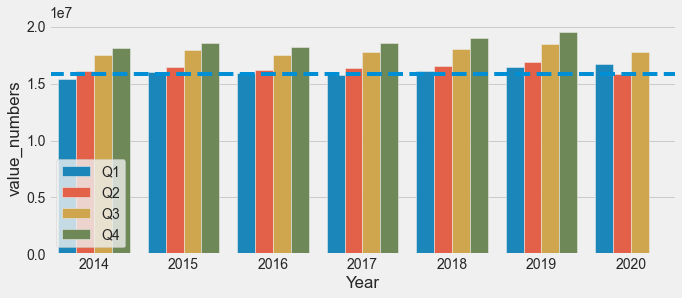

In [141]:
plt.figure(figsize=(10,4))
columns = ["Year", "Q1", "Q2", "Q3", "Q4"]
test_data_melted = pd.melt(df_readgdp, id_vars=columns[0],\
                           var_name="source", value_name="value_numbers")
g = sns.barplot(x=columns[0], y="value_numbers", hue="source",\
                data=test_data_melted)
plt.legend(loc='lower left')

g.axhline(1.589e7, ls='--')
plt.show()

### Observation

Q2 (Quater 2) of 2020 has the lowest GDP compare to other Q2 from other year due to the affection of covid'19 which started 2020